In [9]:
import numpy as np

#parameters
num_bidders = 5
highest_possible_value = 100

#generate private values for each bidder from the interval [0,100]
valuations = np.random.uniform(0,highest_possible_value, num_bidders)

#calculate bidders - fpsb strat
#bidders shade their bid: bid = (N-1)/N * Value; nash equilibrium of first-price sealed-bid auction
bids = valuations * (num_bidders - 1) / num_bidders

#highest wins
winning_bid = np.max(bids)
winner_index = np.argmax(bids)
winner_valuation = valuations[winner_index]

#print results
print(f"Number of bidders: {num_bidders}")
print(f"Private valuations: {valuations}")
print(f"Bids: {bids}")
print(f"Winning bid is : {winning_bid}")
print(f"Winner is bidder {winner_index} with true valuation of {winner_valuation}")

Number of bidders: 5
Private valuations: [27.85359529 60.76211128 76.04350355  4.61996524 11.27874531]
Bids: [22.28287623 48.60968902 60.83480284  3.69597219  9.02299625]
Winning bid is : 60.83480283991461
Winner is bidder 2 with true valuation of 76.04350354989326


In [12]:
#generate more data
import time
num_bidders = 8
highest_possible_value = 100
num_simulations = 100000
revenues = []
start_time = time.time()
for i in range(num_simulations):
    valuations = np.random.uniform(0,highest_possible_value, num_bidders)
    bids = valuations * (num_bidders - 1) / num_bidders
    winning_bid = np.max(bids)
    #store the result
    revenues.append(winning_bid)
average_revenue = np.mean(revenues)
end_time = time.time()
print(f"Avg seller revenue: {average_revenue} over {num_simulations} simulations")
print(f"Time taken: {end_time - start_time:.4f} seconds")

Avg seller revenue: 77.75958378304149 over 100000 simulations
Time taken: 5.5973 seconds


In [13]:
#vectorize the performance

import time

num_simulations = 100000
num_bidders = 5
highest_possible_value = 100

start_time = time.time()
#generate valuations for all the simulations at once
valuations = np.random.uniform(0,highest_possible_value, size = (num_bidders, num_simulations))

bids = valuations * (num_bidders - 1) / num_bidders
#operate along columns
winning_bids = np.max(bids,axis=0)

vectorized_avg_revenue = np.mean(winning_bids)

end_time = time.time()
print(f"--- Vectorized Simulation ---")
print(f"Time taken: {end_time - start_time:.4f} seconds")
print(f"Average Revenue: ${vectorized_avg_revenue:.2f}")

--- Vectorized Simulation ---
Time taken: 0.0095 seconds
Average Revenue: $66.66


We notice how the time exponentially dropped when the vectorized simulation is run. This is all thanks to parallel computing of the valuations using numpy and an extra dimension

In [14]:
#comparing fpsb and spsb
import time
import numpy as np


def simulate(auction_type):
    num_simulations = 1000000
    num_bidders = 5
    highest_possible_value = 100
    
    start_time = time.time()
    #generate valuations for all the simulations at once
    valuations = np.random.uniform(0,highest_possible_value, size = (num_bidders, num_simulations))
    if (auction_type == 'first_price'):
        bids = valuations * (num_bidders - 1) / num_bidders
        winning_bids = np.max(bids,axis=0)
    elif (auction_type == 'second_price'):
        bids = valuations
        winning_bids = np.sort(bids, axis=0)[-2]
    else:
        print('enter a valid auction')
        pass

    # Calculating the efficiency of the auction (aka. did the bidder with highest personal valuation win the auction?
    top_valuer_indices = np.argmax(valuations, axis=0)
    top_bidder_indices = np.argmax(bids, axis=0)
    allocative_efficiency = (top_valuer_indices == top_bidder_indices)
    print("\nWas each auction efficient?:", allocative_efficiency)
    
    efficiency_percentage = np.mean(allocative_efficiency) * 100
    print(f"\nOverall Allocative Efficiency: {efficiency_percentage:.2f}%")
    
    vectorized_avg_revenue = np.mean(winning_bids)
    end_time = time.time()
    print(f"--- Vectorized Simulation ---")
    print(f"Auction type: {auction_type}")
    print(f"Time taken: {end_time - start_time:.4f} seconds")
    print(f"Average Revenue: ${vectorized_avg_revenue:.2f}")

simulate("first_price")
simulate("second_price")


Was each auction efficient?: [ True  True  True ...  True  True  True]

Overall Allocative Efficiency: 100.00%
--- Vectorized Simulation ---
Auction type: first_price
Time taken: 0.3863 seconds
Average Revenue: $66.68

Was each auction efficient?: [ True  True  True ...  True  True  True]

Overall Allocative Efficiency: 100.00%
--- Vectorized Simulation ---
Auction type: second_price
Time taken: 0.5131 seconds
Average Revenue: $66.66


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config
NUM_SIMULATIONS = 100000
NUM_BIDDERS = 5
MAX_VALUE = 100

# Generate FPSB Data
# Generate valuations: shape is (num_bidders, num_simulations)
fpsb_valuations = np.random.uniform(0, MAX_VALUE, size=(NUM_BIDDERS, NUM_SIMULATIONS))
# Calculate bids based on FPSB strategy
fpsb_bids = fpsb_valuations * (NUM_BIDDERS - 1) / NUM_BIDDERS
# Revenue is the highest bid in each auction (column)
fpsb_revenues = np.max(fpsb_bids, axis=0)

# Generate SPSB Data
spsb_valuations = np.random.uniform(0, MAX_VALUE, size=(NUM_BIDDERS, NUM_SIMULATIONS))
# Bids are equal to valuations in SPSB
spsb_bids = spsb_valuations
# Sort bids in each column to find the second-highest
sorted_spsb_bids = np.sort(spsb_bids, axis=0)
# Revenue is the second-highest bid
spsb_revenues = sorted_spsb_bids[-2, :]

# Combine into a DataFrame
results_df = pd.DataFrame({
    'fpsb_revenue': fpsb_revenues,
    'spsb_revenue': spsb_revenues
})

# For the scatter plot, we'll just need one set of valuations and bids
scatter_valuations = fpsb_valuations.flatten() # Flatten to a 1D array
scatter_fpsb_bids = fpsb_bids.flatten()
scatter_spsb_bids = spsb_valuations.flatten() # Bids are the same as valuations


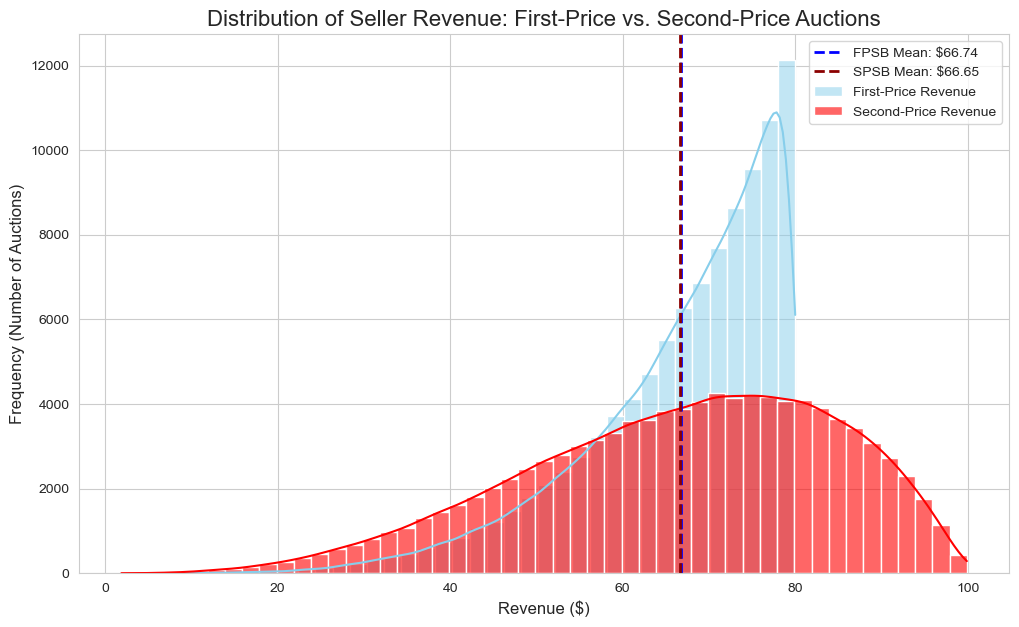

In [16]:
# Set a nice style for the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Plot the histogram for First-Price auctions
sns.histplot(results_df['fpsb_revenue'], color='skyblue', kde=True, label='First-Price Revenue', binwidth=2)

# Plot the histogram for Second-Price auctions on the same axes
sns.histplot(results_df['spsb_revenue'], color='red', kde=True, label='Second-Price Revenue', binwidth=2, alpha=0.6)

# Add vertical lines for the mean (average) revenue of each
plt.axvline(results_df['fpsb_revenue'].mean(), color='blue', linestyle='--', linewidth=2, label=f'FPSB Mean: ${results_df["fpsb_revenue"].mean():.2f}')
plt.axvline(results_df['spsb_revenue'].mean(), color='darkred', linestyle='--', linewidth=2, label=f'SPSB Mean: ${results_df["spsb_revenue"].mean():.2f}')

# Add labels and title
plt.title('Distribution of Seller Revenue: First-Price vs. Second-Price Auctions', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Frequency (Number of Auctions)', fontsize=12)
plt.legend()
plt.show()